# Pronostico

Creación de variables

In [1]:
import pandas as pd
df = pd.read_csv('data_lake/business/precios-diarios.csv')

In [2]:
df

,fecha,hora,precio
0,1997-01-01,11.5,24.194228
1,1997-01-02,11.5,23.417937
2,1997-01-03,11.5,21.348312
3,1997-01-04,11.5,16.795228
4,1997-01-05,11.5,15.358270
...,...,...,...
8881,2021-04-26,11.5,188.325833
8882,2021-04-27,11.5,181.770000
8883,2021-04-28,11.5,175.874167
8884,2021-04-29,11.5,165.203333


In [3]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')
df['weekday'] = df.fecha.dt.weekday 
df

,fecha,hora,precio,weekday
0,1997-01-01,11.5,24.194228,2
1,1997-01-02,11.5,23.417937,3
2,1997-01-03,11.5,21.348312,4
3,1997-01-04,11.5,16.795228,5
4,1997-01-05,11.5,15.358270,6
...,...,...,...,...
8881,2021-04-26,11.5,188.325833,0
8882,2021-04-27,11.5,181.770000,1
8883,2021-04-28,11.5,175.874167,2
8884,2021-04-29,11.5,165.203333,3


Analisis de variable

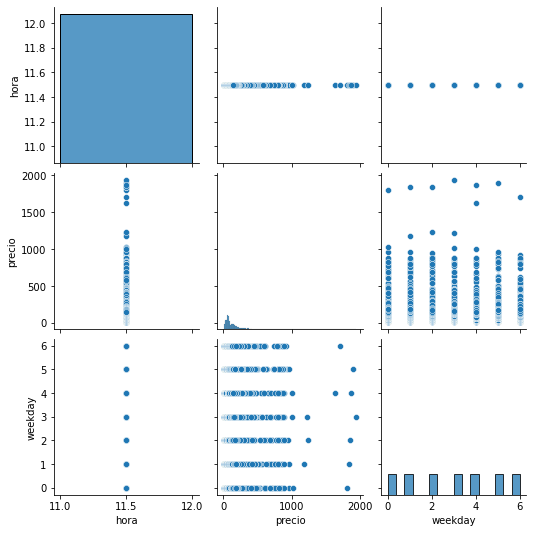

In [4]:
import seaborn as sns

sns.pairplot(df)

Se observa que el precio tiee distribución uniforme todos los días

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(df['weekday']).reshape(-1,1)
y = np.array(df['precio']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=33
)
print (X.shape)
print (y.shape)

(8886, 1)
(8886, 1)


In [6]:
type(y_train[0])

numpy.ndarray

In [8]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Crea el modelo
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)

Coeficientes:  [[-1.04851286]]

Intercepto:  [126.93111349]


In [9]:
import pickle
model = regr.fit(X_train, y_train)
pickle.dump(model, open("precios-diarios.pkl", "wb"))

In [55]:
y_pred = regr.predict(X_test)
print("R^2: {:6.4f}".format(regr.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:6.4f}".format(rmse))

R^2: -0.0007
Root Mean Squared Error: 144.6255


## Analisis pronostico

[]

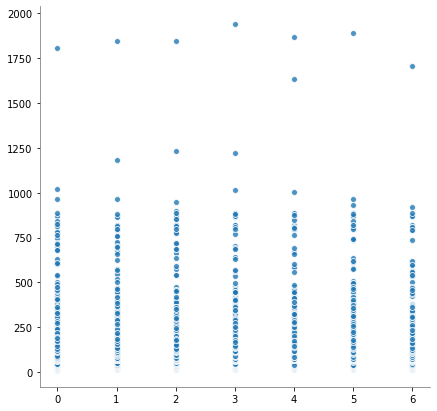

In [57]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

day = df['weekday']
precio = df['precio']

plt.figure(figsize=(7, 7))
plt.scatter(day, precio, color="tab:blue", alpha=0.8, edgecolors="white")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.plot()

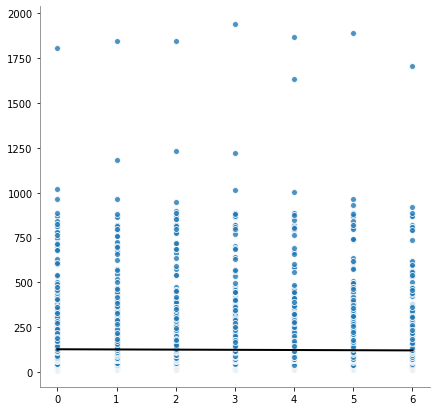

In [60]:
line_X = np.linspace(day.min(), day.max())[:, np.newaxis]
y_pred = regr.predict(line_X)

plt.figure(figsize=(7, 7))

plt.scatter(day, precio, color="tab:blue", alpha=0.8, edgecolors="white")
plt.plot(line_X, y_pred, "k", linewidth=2)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

[]

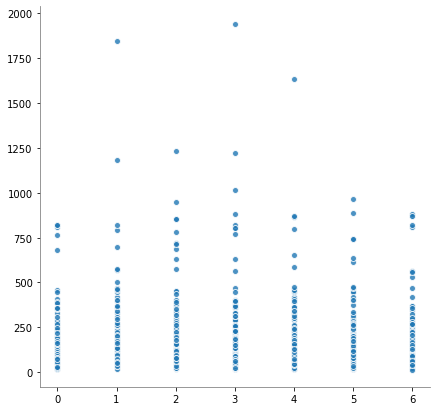

In [62]:
plt.figure(figsize=(7, 7))
plt.scatter(X_test, y_test, color="tab:blue", alpha=0.8, edgecolors="white")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.plot()

[]

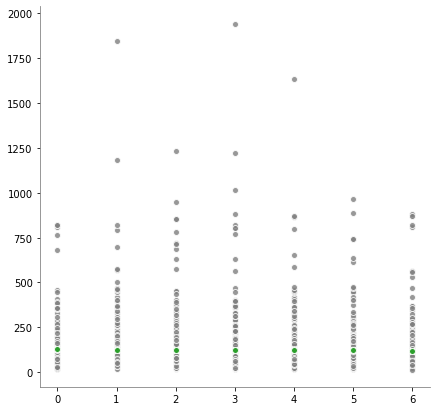

In [66]:
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
plt.figure(figsize=(7, 7))

plt.scatter(X_test, y_test, color="tab:gray", alpha=0.8, edgecolors="white")
plt.scatter(X_test, y_pred, color="tab:green", alpha=0.8, edgecolors="white")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.plot()